In [3]:
#Import all of our necessary libraries

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [4]:
def isFloat(s):
    try:
        float(s)
        return True
    except ValueError:
        #print("Value error: ",s)
        return False

with open("Log-batteryusage.csv") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    num_iters = len(data)-1
    num_nodes = len(data[0])-1
    batteryLevels = [x[:] for x in [[0.0] * num_nodes] * num_iters]
    print(num_nodes)

    for i in range(0,num_iters-1):
        for j in range(1,num_nodes):
            
            if(isFloat(data[i][j])):
                try:
                    batteryLevels[i][j-1] = float(data[i][j])
                except IndexError:
                    print(i,j)

2001


batteryFreq = [[0]*10]*199
for row_num in range(0,199):
    for col in range(0,10):
        ind = int(batteryLevels[row_num ][col]/10)
        batteryFreq[row_num ][ind] += 1

In [5]:
batteryFreq = [[0]*10 for _ in range(200)]
for row_num in range(0,num_iters):
    for col in range(0,num_nodes-1):
        ind = int(batteryLevels[row_num][col+1]/10)
        temp = batteryFreq[row_num][ind] + 1
        batteryFreq[row_num][ind] = temp

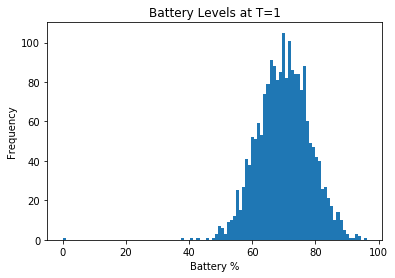

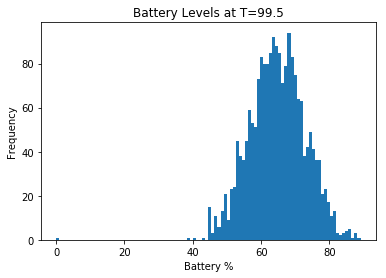

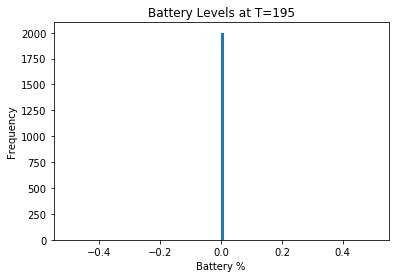

In [6]:
plt.hist(batteryLevels[1][1:], bins=100)
plt.title("Battery Levels at T=1")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[int(num_iters/2)][1:], bins=100)
middle = str(num_iters/2)
plt.title("Battery Levels at T="+middle)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[num_iters-1][1:], bins=100)
end = str(num_iters-4)
plt.title("Battery Levels at T="+end)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

In [76]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 400))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [0,10,20,30,40,50,60,70,80,90]
    y = batteryFreq[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=25, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#to save file:
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())

In [77]:
num = 0
def update_hist(num):
    plt.cla()
    plt.hist(batteryLevels[num],bins=100)
    plt.title("Battery Levels at T="+str(num))
    plt.xlabel("Battery %")
    plt.ylabel("Frequency")

fig = plt.figure()
hist = plt.hist(batteryLevels[0])

animation = animation.FuncAnimation(fig, update_hist, num_iters, fargs=(num) )
HTML(animation.to_html5_video())

In [78]:
b = [x[:] for x in [[0.0] * (num_nodes-2)] * (num_iters-1)]
for i in range(1,num_iters-1):
    b[i-1] = sorted(batteryLevels[i][:2000])
    
j=0
while batteryLevels[1][j] != 0:
    j = j+1
    
print(num_nodes)
print(j,batteryLevels[1][1990:])
print(b[0][0])

2001
2000 [68.1027, 67.1505, 64.8191, 64.2175, 70.9046, 66.3121, 80.1633, 81.5795, 60.0719, 69.8583, 0.0]
42.2607


In [79]:
print("Iteration\tMin\tLowerQuartile\tUpperQuartile\t  Max")
for i in range(0,num_iters-1):
    minimum = b[i][0]
    maximum = b[i][1998]
    lowerq = b[i][499]
    upperq = b[i][1499]
    print("  ",i,"\t","\t",minimum,"\t",lowerq,"\t",upperq,"\t",maximum)

Iteration	Min	LowerQuartile	UpperQuartile	  Max
   0 	 	 42.2607 	 64.6681 	 75.1552 	 94.7117
   1 	 	 42.2607 	 64.648 	 75.1194 	 94.6917
   2 	 	 42.2607 	 64.628 	 75.0916 	 94.6717
   3 	 	 42.2607 	 64.5908 	 75.0652 	 94.6517
   4 	 	 42.2607 	 64.5708 	 75.0452 	 94.6317
   5 	 	 42.2607 	 64.5508 	 74.9944 	 94.6116
   6 	 	 42.2607 	 64.4983 	 74.971 	 94.5916
   7 	 	 42.2607 	 64.4783 	 74.9481 	 94.5716
   8 	 	 42.2607 	 64.4296 	 74.9264 	 94.5516
   9 	 	 42.2607 	 64.4069 	 74.9063 	 94.5316
   10 	 	 42.2607 	 64.3868 	 74.8482 	 94.5116
   11 	 	 42.2607 	 64.3411 	 74.8174 	 94.4916
   12 	 	 42.2607 	 64.3191 	 74.7633 	 94.4716
   13 	 	 42.2607 	 64.2678 	 74.6901 	 94.4516
   14 	 	 42.2607 	 64.2396 	 74.6399 	 94.4316
   15 	 	 42.2607 	 64.1429 	 74.5986 	 94.4116
   16 	 	 42.2607 	 64.0453 	 74.5638 	 94.3916
   17 	 	 42.2607 	 64.0193 	 74.5272 	 94.3716
   18 	 	 42.2607 	 63.9575 	 74.4913 	 94.3516
   19 	 	 42.2607 	 63.9302 	 74.436 	 94.3316
   20 